![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

20250714 16:40:05.565 TRACE:: QuantBook started; Is Python: True
20250714 16:40:05.686 TRACE:: Config.GetValue(): downloader-data-update-period - Using default value: 7
20250714 16:40:05.697 TRACE:: Config.Get(): Configuration key not found. Key: databases-refresh-period - Using default value: 1.00:00:00
20250714 16:40:07.775 TRACE:: Config.GetValue(): qb-data-hour - Using default value: 9
20250714 16:40:07.784 TRACE:: Config.Get(): Configuration key not found. Key: lean-manager-type - Using default value: LocalLeanManager
20250714 16:40:07.785 TRACE:: Config.Get(): Configuration key not found. Key: data-permission-manager - Using default value: DataPermissionManager
20250714 16:40:07.785 TRACE:: Config.Get(): Configuration key not found. Key: data-monitor - Using default value: QuantConnect.Data.DataMonitor
20250714 16:40:07.787 TRACE:: Config.GetValue(): zip-data-cache-provider - Using default value: 10
20250714 16:40:07.787 TRACE:: Config.Get(): Configuration key not found. Key: fun

<Axes: >

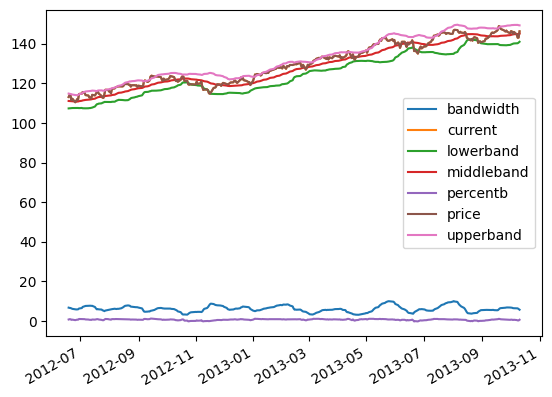

In [1]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/v2/our-platform/research/getting-started]
qb = QuantBook()
spy = qb.add_equity("SPY")
# Locally Lean installs free sample data, to download more data please visit https://www.quantconnect.com/docs/v2/lean-cli/datasets/downloading-data 
qb.set_start_date(2013, 10, 11)
history = qb.history(qb.securities.keys(), 360, Resolution.DAILY)

# Indicator Analysis
bbdf = qb.indicator(BollingerBands(30, 2), spy.symbol, 360, Resolution.DAILY)
bbdf.drop('standarddeviation', axis=1).plot()

In [1]:
qb = QuantBook()

def filter_function(fundamentals):
    sorted_by_pe_ratio = sorted(
        [f for f in fundamentals if not np.isnan(f.valuation_ratios.pe_ratio)], 
        key=lambda fundamental: fundamental.valuation_ratios.pe_ratio
    )
    return [fundamental.symbol for fundamental in sorted_by_pe_ratio[:10]]

universe = qb.add_universe(filter_function)


20250715 10:50:57.078 TRACE:: QuantBook started; Is Python: True
20250715 10:50:57.260 TRACE:: Config.GetValue(): downloader-data-update-period - Using default value: 7
20250715 10:50:57.268 TRACE:: Config.Get(): Configuration key not found. Key: databases-refresh-period - Using default value: 1.00:00:00
20250715 10:50:58.789 TRACE:: Config.GetValue(): qb-data-hour - Using default value: 9
20250715 10:50:58.829 TRACE:: Config.Get(): Configuration key not found. Key: lean-manager-type - Using default value: LocalLeanManager
20250715 10:50:58.833 TRACE:: Config.Get(): Configuration key not found. Key: data-permission-manager - Using default value: DataPermissionManager
20250715 10:50:58.833 TRACE:: Config.Get(): Configuration key not found. Key: data-monitor - Using default value: QuantConnect.Data.DataMonitor
20250715 10:50:58.839 TRACE:: Config.GetValue(): zip-data-cache-provider - Using default value: 10
20250715 10:50:58.840 TRACE:: Config.Get(): Configuration key not found. Key: fun

In [2]:
universe_history = qb.universe_history(universe, datetime(2023, 11, 6), datetime(2023, 11, 13))


20250715 10:51:23.331 TRACE:: Config.GetValue(): data-feed-workers-count - Using default value: 12
20250715 10:51:23.333 TRACE:: Config.GetValue(): data-feed-max-work-weight - Using default value: 400
20250715 10:51:23.334 TRACE:: WeightedWorkScheduler(): will use 12 workers and MaxWorkWeight is 400


In [4]:
print(universe_history)

Empty DataFrame
Columns: []
Index: []
